<a href="https://colab.research.google.com/github/donib-irakihda/fusemachines-ai-fellowship/blob/main/OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Using OLS method to find our b1, b0 for linear regression 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display, HTML

In [ ]:
data_path = "https://www.statlearning.com/s/Advertising.csv" 
data_df = pd.read_csv(data_path, index_col=0)
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


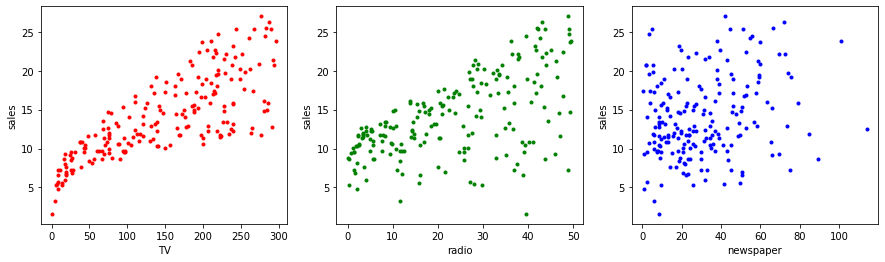

In [ ]:
fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# Plot of sales vs TV
ax = fig.add_subplot(gs[0])
ax.scatter(data_df['TV'], data_df['sales'],color='red', marker='.')
ax.set_xlabel("TV")
ax.set_ylabel("sales")

# Plot of sales vs radio
ax = fig.add_subplot(gs[1])
ax.scatter(data_df['radio'], data_df['sales'], color='green', marker='.')
ax.set_xlabel("radio")
ax.set_ylabel("sales")

# Plot of sales vs newspaper
ax = fig.add_subplot(gs[2])
ax.scatter(data_df['newspaper'], data_df['sales'], color='blue', marker='.')
ax.set_xlabel("newspaper")
ax.set_ylabel("sales")

plt.show()

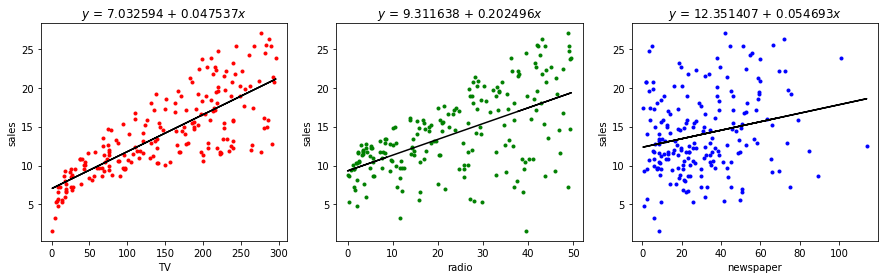

In [ ]:
fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

def train_plot(data_df, feature, ax, c):

  X = data_df[[feature]].values
  Y = data_df[["sales"]].values

  x_mean = np.mean(X)
  y_mean = np.mean(Y)
  
  n = len(X)

  # Using OLS formula to calculate the b1 and b0
  numerator = 0
  denominator = 0
  for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
  
  b1 = numerator/denominator
  b0 = y_mean - (b1 * x_mean)
  y_cap = b0 + np.dot(X, b1)

  # Plot the regression line
  ax.scatter(data_df[feature], data_df['sales'], color=c , marker='.')
  ax.plot(X, y_cap, color='black')
  ax.set_xlabel(feature)
  ax.set_ylabel("sales")
  ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))

# Train model using TV data to predict sale
ax0 = fig.add_subplot(gs[0])
train_plot(data_df, "TV", ax0, "red")

# Train model usinf radio data
ax0 = fig.add_subplot(gs[1])
train_plot(data_df, "radio", ax0, "green")

# Train model using newspaper data
ax0 = fig.add_subplot(gs[2])
train_plot(data_df, "newspaper", ax0, "blue")

plt.show()

In [ ]:
# Training Linear Regression using TV and Radio features
X = data_df[["TV", "radio"]]
y = data_df[["sales"]]

# set bias/intercept term to 1 for each 200 samples
X = np.c_[np.ones((200, 1)), X]
X_transpose = np.transpose(X)

# implementing least square solution of matrix form
betas = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

message = """<strong>TV and Radio</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio
""".format(*betas[0], *betas[1], *betas[2])
display(HTML( message ))

print("")

# # Training Linear Regression using all features
X = data_df[["TV", "radio", "newspaper"]]
y = data_df[["sales"]]

# set bias/intercept term to 1 for each 200 samples
X = np.c_[np.ones((200, 1)), X]
X_transpose = np.transpose(X)

# implementing least square solution of matrix form
betas = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

message = """<strong>TV, Radio, and Newspaper</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ + {:.2f}$x_{{3}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio <br>
$x_{{3}}$ = newspaper
""".format(*betas[0], *betas[1], *betas[2], *betas[3])
display(HTML( message ))